# Voronoi Graphs

In [1]:
# Make the relevant imports including Voronoi methods
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
%matplotlib inline 


In [2]:
plt.rcParams["figure.figsize"] = [12, 12]

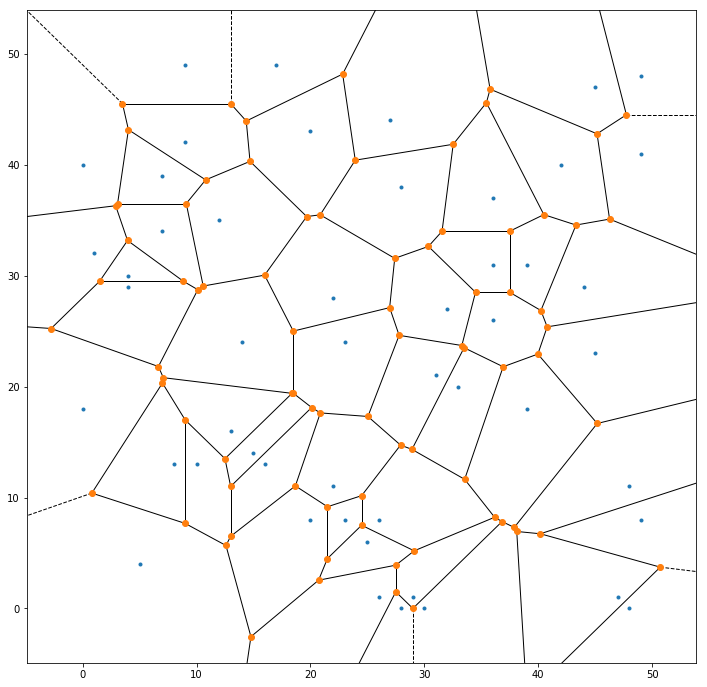

In [3]:

# Recreate the figure above for a new set of random points
points = np.random.randint(50, size=(50, 2))
graph = Voronoi(points)
voronoi_plot_2d(graph)
plt.show()

In [4]:
# Read in the obstacle data
filename = '../colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)

In [5]:
# If you want to use the prebuilt bresenham method
# Import the Bresenham package
from bresenham import bresenham

In [6]:
# Here you'll modify the `create_grid()` method from a previous exercise
# In this new function you'll record obstacle centres and
# create a Voronoi graph around those points
def create_grid_and_edges(data, drone_altitude, safety_distance):
    """
    Returns a grid representation of a 2D configuration space
    along with Voronoi graph edges given obstacle data and the
    drone's altitude.
    """

    # minimum and maximum north coordinates
    north_min = np.floor(np.min(data[:, 0] - data[:, 3]))
    north_max = np.ceil(np.max(data[:, 0] + data[:, 3]))

    # minimum and maximum east coordinates
    east_min = np.floor(np.min(data[:, 1] - data[:, 4]))
    east_max = np.ceil(np.max(data[:, 1] + data[:, 4]))

    # given the minimum and maximum coordinates we can
    # calculate the size of the grid.
    north_size = int(np.ceil((north_max - north_min)))
    east_size = int(np.ceil((east_max - east_min)))

    # Initialize an empty grid
    grid = np.zeros((north_size, east_size))
    # Center offset for grid
    north_min_center = np.min(data[:, 0])
    east_min_center = np.min(data[:, 1])
    
    # Define a list to hold Voronoi points
    points = []
    # Populate the grid with obstacles
    for i in range(data.shape[0]):
        north, east, alt, d_north, d_east, d_alt = data[i, :]

        if alt + d_alt + safety_distance > drone_altitude:
            obstacle = [
                int(north - d_north - safety_distance - north_min_center),
                int(north + d_north + safety_distance - north_min_center),
                int(east - d_east - safety_distance - east_min_center),
                int(east + d_east + safety_distance - east_min_center),
            ]
            grid[obstacle[0]:obstacle[1]+1, obstacle[2]:obstacle[3]+1] = 1
            
            # add center of obstacles to points list
            points.append([north - north_min, east - east_min])

    # TODO: create a voronoi graph based on
    # location of obstacle centres
    graph = Voronoi(points)
    # voronoi_plot_2d(graph)  # uncomment to view raw voronoi graph
    
    print(grid.shape)
    # TODO: check each edge from graph.ridge_vertices for collision
    edges = []
    for v in graph.ridge_vertices:
        p1 = graph.vertices[v[0]]
        p2 = graph.vertices[v[1]]
        # Converting to int here would technically modify the 
        # voronoi diagram, so we'll use a new var name.
        p1i = [int(p) for p in p1]
        p2i = [int(p) for p in p2]
        
        if p1[0] < 0 or p1[0] >= north_size or \
           p2[0] < 0 or p2[0] >= north_size or \
           p1[1] < 0 or p1[1] >= east_size or \
           p2[1] < 0 or p2[1] >= east_size or \
           grid[p1i[0], p1i[1]] or grid[p2i[0], p2i[1]]:
                continue
                
        # Then you can test each pair p1 and p2 for collision using Bresenham
        # (need to convert to integer if using prebuilt Python package)
        # If the edge does not hit an obstacle
        # add it to the list
        line = bresenham(p1i[0], p1i[1], p2i[0], p2i[1])
        #print([p for p in pts])
        # Check to see if any of the points are in collision
        in_collision = np.any([grid[p[0], p[1]] for p in line])
        if not in_collision:
            edges.append((tuple(p1), tuple(p2)))
    
    return grid, edges

In [7]:
# Define a flying altitude (feel free to change this)
drone_altitude = 15
safety_distance = 2
grid, edges = create_grid_and_edges(data, drone_altitude, safety_distance)
print('Found %5d edges' % len(edges))

(921, 921)
Found  1140 edges


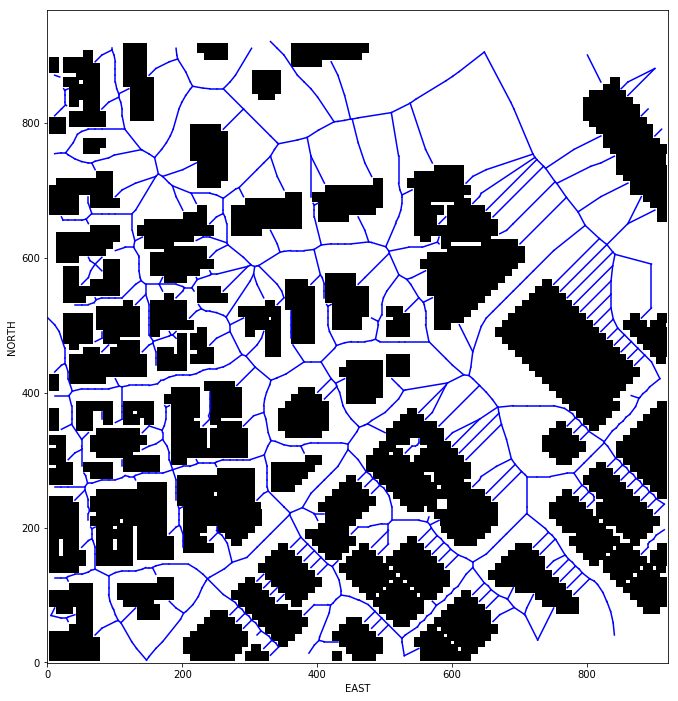

In [8]:
# equivalent to
# plt.imshow(np.flip(grid, 0))
# Plot it up!
plt.imshow(grid, origin='lower', cmap='Greys') 

# Stepping through each edge
for e in edges:
    p1 = e[0]
    p2 = e[1]
    plt.plot([p1[1], p2[1]], [p1[0], p2[0]], 'b-')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

[solution](/notebooks/Voronoi-Solution.ipynb)